In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Wealth Inequality Data EDA

In [3]:
# data found from US Census Bureau for wealth inequality
# drop na to remove irrelevant rows (footnotes)
wealth = pd.read_excel('/content/drive/My Drive/DAT 490 Capstone Project/Project Data/Census Bureau Wealth Inequality/Census Bureau Income Dist 1967-2023.xlsx'
                        , header = 5).rename(columns = {'Unnamed: 0':'year'}).dropna()

# replace newline char with space in column names
wealth.columns = wealth.columns.str.replace('\s', ' ', regex = True)

# clean year column
wealth['year'] = wealth['year'].replace('\s',' ', regex = True).replace('\s.*','', regex = True)

print('All fields except for the year are floats. The year should be converted to an int for the analysis.\n')
display(wealth.info())

# convert year to int dtype
wealth['year'] = wealth['year'].astype(int)

# drop duplicate years
wealth.drop_duplicates(subset = ['year'], keep = 'first', inplace = True)

print('\n\nHere are the first five rows of the data now that all of the fields are numerical.\n')
display(wealth.head())

All fields except for the year are floats. The year should be converted to an int for the analysis.

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 0 to 58
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      59 non-null     object 
 1   10th percentile           59 non-null     float64
 2   20th percentile           59 non-null     float64
 3   30th percentile           59 non-null     float64
 4   40th percentile           59 non-null     float64
 5   50th percentile (median)  59 non-null     float64
 6   60th percentile           59 non-null     float64
 7   70th percentile           59 non-null     float64
 8   80th percentile           59 non-null     float64
 9   90th percentile           59 non-null     float64
 10  95th percentile           59 non-null     float64
 11  90th/10th                 59 non-null     float64
 12  90th/50th                 

None



Here are the first five rows of the data now that all of the fields are numerical.



,year,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
0,2023,18980.0,33000.0,47910.0,62200.0,80610.0,101000.0,127300.0,165300.0,234900.0,316100.0,12.38,2.91,4.25
1,2022,17780.0,31190.0,45680.0,60330.0,77540.0,97730.0,123400.0,159100.0,224500.0,306700.0,12.63,2.90,4.36
2,2021,17540.0,31360.0,45380.0,61590.0,79260.0,100500.0,126800.0,167000.0,237400.0,320600.0,13.53,2.99,4.52
3,2020,18310.0,31900.0,46680.0,61520.0,79560.0,100100.0,126900.0,166100.0,236300.0,321700.0,12.90,2.97,4.34
4,2019,18940.0,33200.0,47760.0,63240.0,81210.0,102200.0,129700.0,168400.0,237800.0,319200.0,12.55,2.93,4.29


In [4]:
print('Now that all variables are numerical, the describe function will give some descriptive statistics for them.\n')
display(wealth.describe())

Now that all variables are numerical, the describe function will give some descriptive statistics for them.



,year,10th percentile,20th percentile,30th percentile,40th percentile,50th percentile (median),60th percentile,70th percentile,80th percentile,90th percentile,95th percentile,90th/10th,90th/50th,50th/10th
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1995.000000,15886.666667,27079.122807,38829.473684,51352.105263,65290.701754,80518.596491,99453.859649,124986.491228,169242.105263,219026.315789,10.564561,2.566842,4.108596
std,16.598193,1432.954407,2475.473462,3563.252638,4841.576535,6854.374740,9952.976841,14294.219705,21230.643074,34617.083661,51043.743587,1.373005,0.272240,0.158367
min,1967.000000,12210.000000,22480.000000,33590.000000,43840.000000,53530.000000,62220.000000,74720.000000,88720.000000,112700.000000,142400.000000,8.530000,2.070000,3.840000
25%,1981.000000,14990.000000,25270.000000,36100.000000,47560.000000,59330.000000,72020.000000,86490.000000,105700.000000,137000.000000,171500.000000,9.230000,2.350000,3.990000
50%,1995.000000,15600.000000,26640.000000,38370.000000,50600.000000,64610.000000,79010.000000,97050.000000,121900.000000,164100.000000,211500.000000,10.420000,2.610000,4.090000
75%,2009.000000,16950.000000,28690.000000,40570.000000,53860.000000,68870.000000,86260.000000,108000.000000,137200.000000,189000.000000,247100.000000,11.370000,2.760000,4.210000
max,2023.000000,18980.000000,33200.000000,47910.000000,63240.000000,81210.000000,102200.000000,129700.000000,168400.000000,237800.000000,321700.000000,13.530000,2.990000,4.520000


In [5]:
print('The unique years in this dataset are:')
display(wealth['year'].sort_values().values)

print(f'\nThere are {wealth.isna().sum().sum()} null values in this dataset.')

The unique years in this dataset are:


array([1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])


There are 0 null values in this dataset.


The ratios should provide valuable insight for this analysis. Here are some visualizations of their distributions.



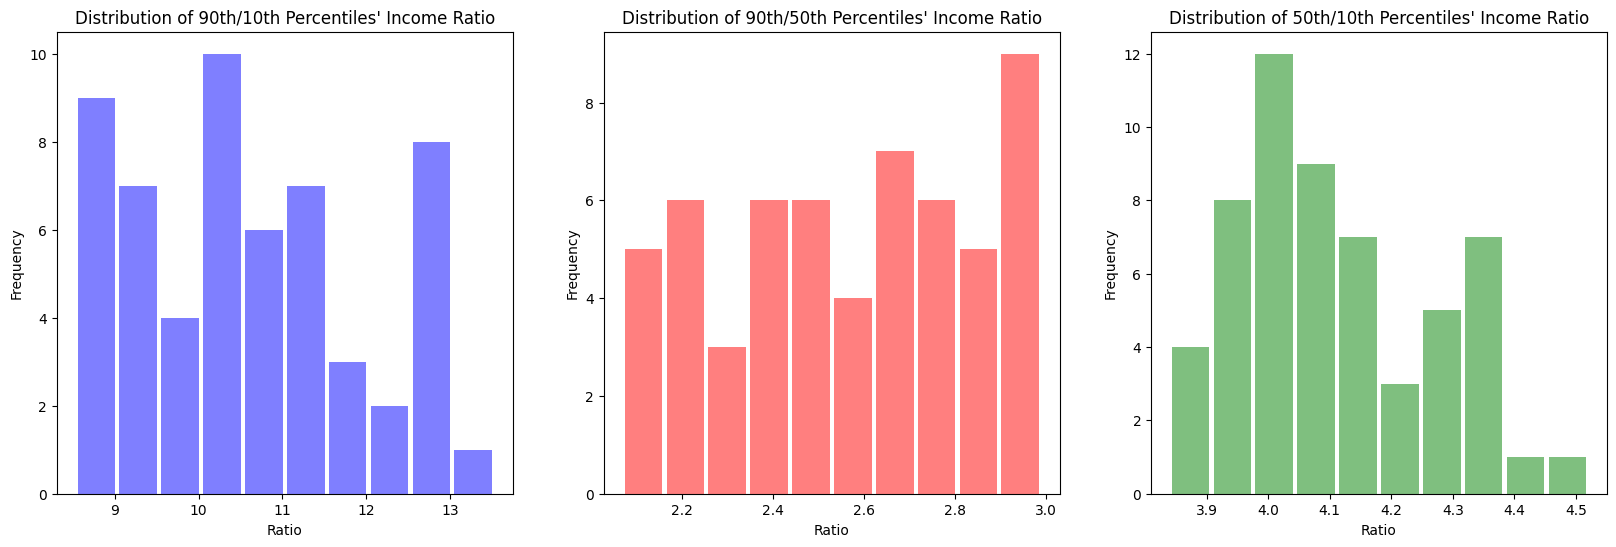

In [6]:
print('The ratios should provide valuable insight for this analysis. Here are some visualizations of their distributions.\n')

fig, ax = plt.subplots(1, 3, figsize = (20, 6))

ax[0].hist(wealth['90th/10th'], color = 'blue', bins = 10, rwidth = 0.9, alpha = 0.5)
ax[0].set_title('Distribution of 90th/10th Percentiles\' Income Ratio')
ax[0].set_xlabel('Ratio')
ax[0].set_ylabel('Frequency')

ax[1].hist(wealth['90th/50th'], color = 'red', bins = 10, rwidth = 0.9, alpha = 0.5)
ax[1].set_title('Distribution of 90th/50th Percentiles\' Income Ratio')
ax[1].set_xlabel('Ratio')
ax[1].set_ylabel('Frequency')

ax[2].hist(wealth['50th/10th'], color = 'green', bins = 10, rwidth = 0.9, alpha = 0.5)
ax[2].set_title('Distribution of 50th/10th Percentiles\' Income Ratio')
ax[2].set_xlabel('Ratio')
ax[2].set_ylabel('Frequency');

And now for the changes in the ratios over time.



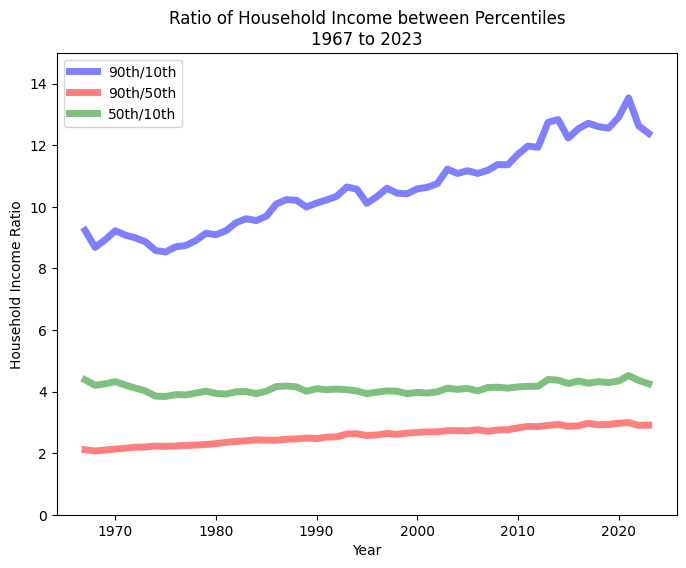

In [7]:
print('And now for the changes in the ratios over time.\n')

fix, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(wealth['year'], wealth['90th/10th'], color = 'blue', linewidth = 5, alpha = 0.5)
ax.plot(wealth['year'], wealth['90th/50th'], color = 'red', linewidth = 5, alpha = 0.5)
ax.plot(wealth['year'], wealth['50th/10th'], color = 'green', linewidth = 5, alpha = 0.5)
ax.set_title(f'Ratio of Household Income between Percentiles\n1967 to 2023')
ax.set_xlabel('Year')
ax.set_ylabel('Household Income Ratio')
ax.set_ylim((0,15))
ax.legend(['90th/10th', '90th/50th', '50th/10th']);

These visualizations show the ratios between percentiles, now to show the percentiles themselves.



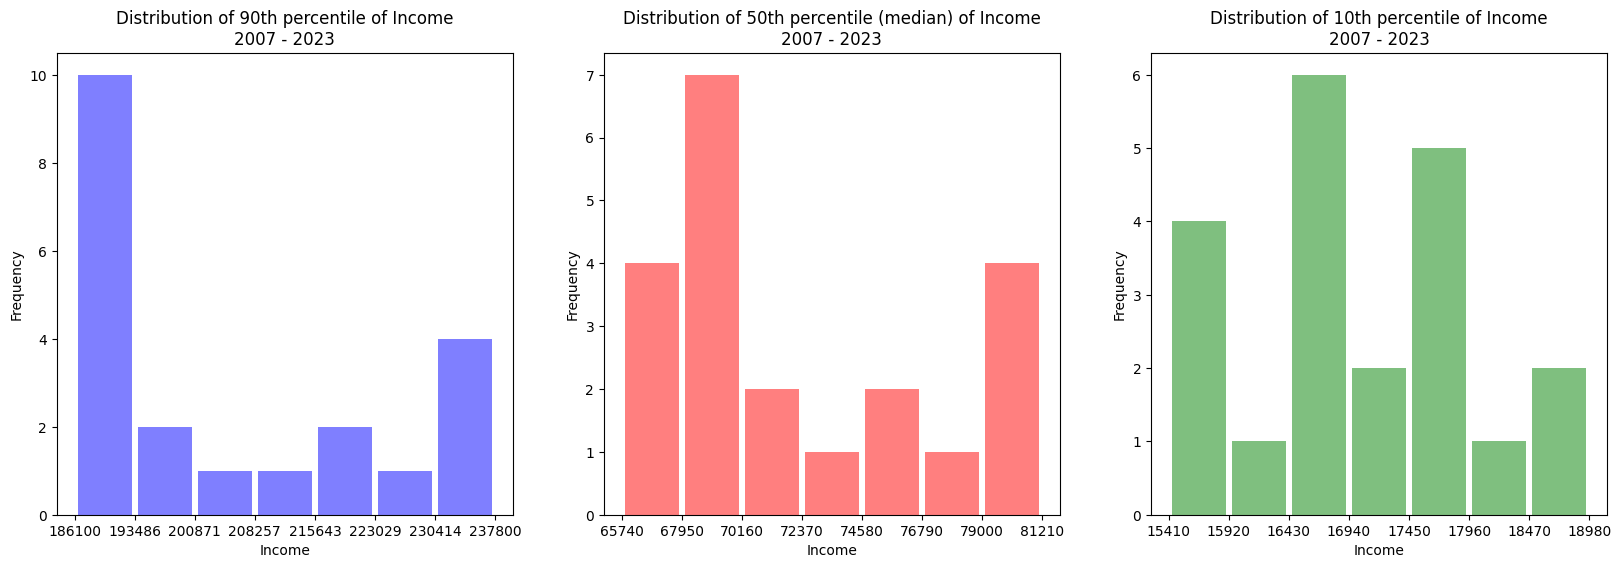

In [8]:
print('These visualizations show the ratios between percentiles, now to show the percentiles themselves.\n')
fig, ax = plt.subplots(1, 3, figsize = (20,6))

n = 0
colors = ['blue', 'red', 'green']
for i in ['90th percentile', '50th percentile (median)', '10th percentile']:
  counts, bins, patches = ax[n].hist(wealth[i].loc[wealth['year'].isin([x for x in range(2003,2024)])], bins = 7, rwidth = 0.9, alpha = 0.5, color = colors[n])
  ax[n].set_xticks(bins)
  ax[n].set_title(f'Distribution of {i} of Income\n2007 - 2023')
  ax[n].set_xlabel('Income')
  ax[n].set_ylabel('Frequency')
  n += 1

These visualizations show the ratios between percentiles, now to show the percentiles themselves.



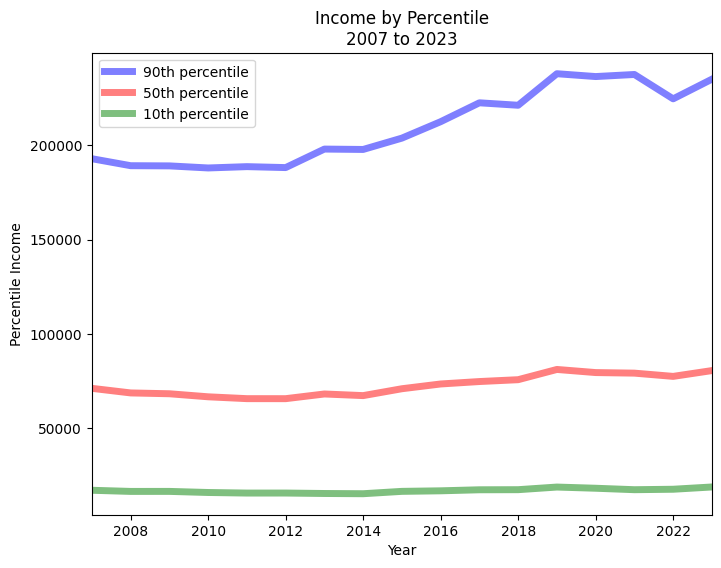

In [9]:
print('These visualizations show the ratios between percentiles, now to show the percentiles themselves.\n')
fig, ax = plt.subplots(1, 1, figsize = (8,6))

ax.plot(wealth['year'].loc[wealth['year'].isin([x for x in range(2007,2024)])], wealth['90th percentile'].loc[wealth['year'].isin([x for x in range(2007,2024)])], color = 'blue', linewidth = 5, alpha = 0.5)
ax.plot(wealth['year'].loc[wealth['year'].isin([x for x in range(2007,2024)])], wealth['50th percentile (median)'].loc[wealth['year'].isin([x for x in range(2007,2024)])], color = 'red', linewidth = 5, alpha = 0.5)
ax.plot(wealth['year'].loc[wealth['year'].isin([x for x in range(2007,2024)])], wealth['10th percentile'].loc[wealth['year'].isin([x for x in range(2007,2024)])], color = 'green', linewidth = 5, alpha = 0.5)
ax.set_title(f'Income by Percentile\n2007 to 2023')
ax.set_xlim((2007,2023))
ax.set_xlabel('Year')
ax.set_ylabel('Percentile Income')
ax.legend(['90th percentile', '50th percentile', '10th percentile']);




###CPI Data EDA

In [118]:
# Consumer Price Index Data from Bureau of Labor Statistics

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
worksheet = gc.open('BLS CPI 1999-2024').sheet1
rows = worksheet.get_all_values()

CPI = pd.DataFrame.from_records(rows)
CPI = pd.DataFrame(data = CPI.values[1:], columns = CPI.iloc[0])

CPI

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,1999,164.3,164.5,165,166.2,166.2,166.2,166.7,167.1,167.9,168.2,168.3,168.3,166.6,165.4,167.8
1,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174,174.1,174,172.2,170.8,173.6
2,2001,175.1,175.8,176.2,176.9,177.7,178,177.5,177.5,178.3,177.7,177.4,176.7,177.1,176.6,177.5
3,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181,181.3,181.3,180.9,179.9,178.9,180.9
4,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185,184.5,184.3,184,183.3,184.6
5,2004,185.2,186.2,187.4,188,189.1,189.7,189.4,189.5,189.9,190.9,191,190.3,188.9,187.6,190.2
6,2005,190.7,191.8,193.3,194.6,194.4,194.5,195.4,196.4,198.8,199.2,197.6,196.8,195.3,193.2,197.4
7,2006,198.3,198.7,199.8,201.5,202.5,202.9,203.5,203.9,202.9,201.8,201.5,201.8,201.6,200.6,202.6
8,2007,202.416,203.499,205.352,206.686,207.949,208.352,208.299,207.917,208.49,208.936,210.177,210.036,207.342,205.709,208.976
9,2008,211.08,211.693,213.528,214.823,216.632,218.815,219.964,219.086,218.783,216.573,212.425,210.228,215.303,214.429,216.177


In [151]:
# create dataframe for monthly inflation data
CPI_month = CPI.melt(id_vars = 'Year', value_vars = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
         var_name = 'month', value_name = 'CPI').rename(columns = {'Year':'year'})

# update month to categorical dtype for sorting
CPI_month['month'] = CPI_month['month'].astype(pd.CategoricalDtype(categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered = True))

# dictionary for converting month names to numbers
months_dict = {}
x = 1

for i in CPI_month['month'].unique():
  months_dict[i] = x
  x += 1

# convert months to integers
CPI_month['month'] = CPI_month['month'].map(months_dict)
CPI_month['month'] = CPI_month['month'].astype(int)

# update CPI dtype to float, year to int
CPI_month['CPI'] = CPI_month['CPI'].replace('','0.0').astype(float).replace(0.0,np.nan)
CPI_month['year'] = CPI_month['year'].astype(int)

# calculate % monthly change in CPI
CPI_month['Monthly % Change'] = round(CPI_month['CPI'].replace(np.nan,0.0).pct_change() * 100,4)

# drop null values & sort
CPI_month = CPI_month[CPI_month['year'] > 1999].dropna().sort_values(by = ['year', 'month']).reset_index(drop = True)

CPI_month

,year,month,CPI,Monthly % Change
0,2000,1,168.800,2.7389
1,2000,2,169.800,3.2219
2,2000,3,171.200,3.7576
3,2000,4,171.300,3.0686
4,2000,5,171.500,3.1889
...,...,...,...,...
291,2024,4,313.548,3.3574
292,2024,5,314.069,3.2690
293,2024,6,314.175,2.9714
294,2024,7,314.540,2.8948


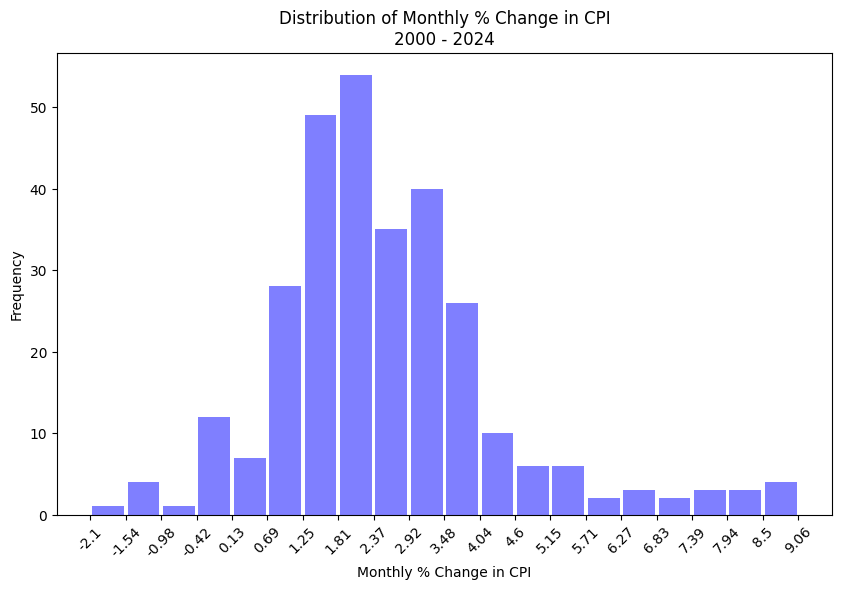

In [159]:
fix, ax = plt.subplots(1, 1, figsize = (10,6))

counts, bins, patches = ax.hist(CPI_month['Monthly % Change'], bins = 20, rwidth = .9, color = 'blue', alpha = .5)
ax.set_xticks(bins.round(2))
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
ax.set_title('Distribution of Monthly % Change in CPI\n2000 - 2024')
ax.set_xlabel('Monthly % Change in CPI')
ax.set_ylabel('Frequency');

In [157]:
CPI_month.groupby('month').mean(['CPI'])['CPI']

,CPI
month,
1,226.025560
2,227.080880
3,228.340680
4,229.167720
5,229.930680
6,230.672120
7,230.894120
8,231.202720
9,228.188917


In [163]:
# create dataframe for annual inflation data
CPI_year = CPI[['Year', 'Annual']].rename(columns = {'Year':'year','Annual':'CPI'})

# convert dtypes
CPI_year = CPI_year.replace('','0.0').astype({'year':'int', 'CPI':'float'}).replace(0.0,np.nan)

# add annual inflation for 2024
CPI_year.iloc[-1:] = [2024, np.mean(CPI_month['CPI'].loc[CPI_month['year'] == 2024])]

# # calculate % annual change in CPI
CPI_year['Annual % Change'] = round(CPI_year['CPI'].pct_change() * 100, 4)

# drop null values
CPI_year = CPI_year.dropna()

CPI_year

,year,CPI,Annual % Change
1,2000,172.200000,3.3613
2,2001,177.100000,2.8455
3,2002,179.900000,1.5810
4,2003,184.000000,2.2790
5,2004,188.900000,2.6630
6,2005,195.300000,3.3880
7,2006,201.600000,3.2258
8,2007,207.342000,2.8482
9,2008,215.303000,3.8396
10,2009,214.537000,-0.3558


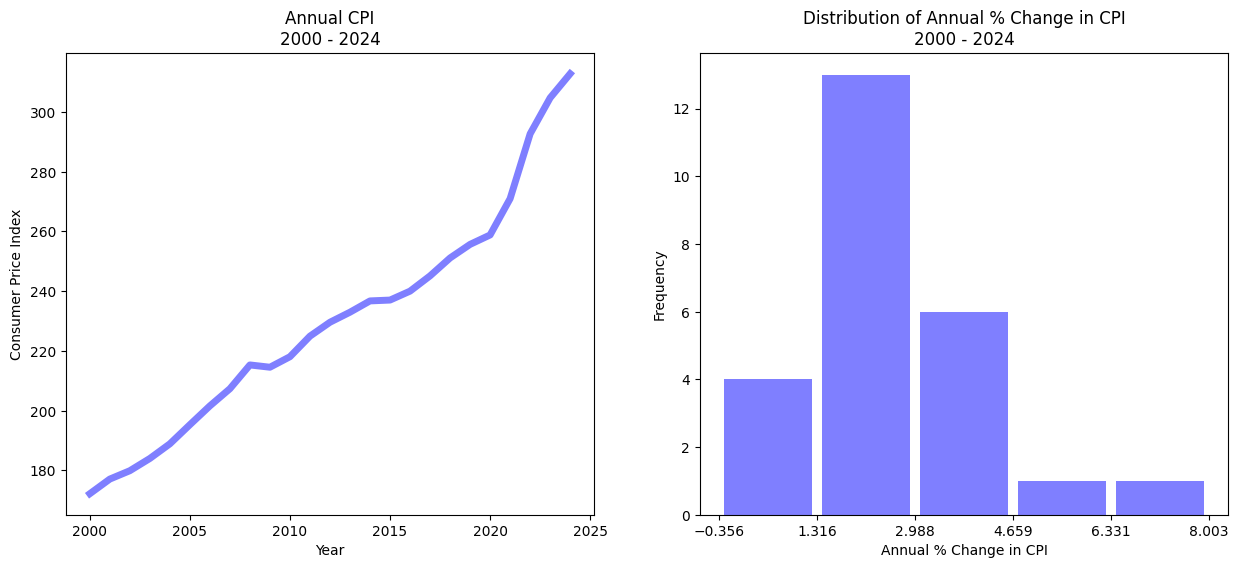

In [167]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))

ax[0].plot(CPI_year['year'], CPI_year['CPI'], color = 'blue', linewidth = 5, alpha = 0.5)
ax[0].set_title(f'Annual CPI\n2000 - 2024')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Consumer Price Index')

counts, bins, patches = ax[1].hist(CPI_year['Annual % Change'], bins = 5, rwidth = 0.9, color = 'blue', alpha = 0.5)
ax[1].set_xticks(bins)
ax[1].set_title('Distribution of Annual % Change in CPI\n2000 - 2024')
ax[1].set_xlabel('Annual % Change in CPI')
ax[1].set_ylabel('Frequency');